In [44]:
### Imports and Auxiliary Functions

import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from math import pi

M_sun = const.M_sun.cgs.value
k = const.k_B.cgs.value
m_e = const.m_e.cgs.value
c = const.c.cgs.value
m_p = const.m_p.cgs.value

def Schwarzchild(M):
    return(3e5 * M / M_sun)

def n(m_dot, r_g, x):
    constant = 1 / (2 * pi * m_p * c)
    value = constant * m_dot / (np.power(r_g, 2) * np.power(x, 1.5))
    return(value)

def CoulombCoupling(m_dot, r_g, x, Tp, Te):
    constant = 3.2e-12 * k / m_p
    value = constant * np.power(n(m_dot, r_g, x), 2) * (Tp - Te) * np.sqrt(m_e / np.power(Te, 3))
    return(value)

def BrakingRadCool(m_dot, r_g, x, Te):
    value = 1.4e-27 * np.power(n(m_dot, r_g, x), 2) * np.sqrt(Te)
    return(value)
    
def f(m_dot, r_g, x, Tp, Te):
    value = (4 * pi * m_p * r_g ** 3) * ((x ** 2) * (CoulombCoupling(m_dot, r_g, x, Tp, Te))) / (3 * k * m_dot) - (Tp * (3 * x - 4) ) / (3 * x * (x - 1))
    return(value)

def g(m_dot, r_g, x, Tp, Te):
    value =  - (4 * pi * m_p * r_g ** 3) * ((x ** 2) * (CoulombCoupling(m_dot, r_g, x, Tp, Te) - BrakingRadCool(m_dot, r_g, x, Te))) / (3 * k * m_dot) - (Te * (3 * x - 4) ) / (3 * x * (x - 1))
    return(value)
    
def multi_RK4(m_dot, r_g, init_conditions, h, N):
    solns = np.zeros((np.size(init_conditions), N))
    solns[:, 0] = init_conditions
    for i in range(N - 1):        
        k_0 = f(m_dot, r_g, solns[0, i], solns[1, i], solns[2, i])
        l_0 = g(m_dot, r_g, solns[0, i], solns[1, i], solns[2, i])
        
        k_1 = f(m_dot, r_g, solns[0, i] + h / 2, solns[1, i] + (h / 2) * k_0, solns[2, i] + (h/2) * l_0)
        l_1 = g(m_dot, r_g, solns[0, i] + h / 2, solns[1, i] + (h / 2) * k_0, solns[2, i] + (h/2) * l_0)
        
        k_2 = f(m_dot, r_g, solns[0, i] + h / 2, solns[1, i] + (h / 2) * k_1, solns[2, i] + (h/2) * l_1)
        l_2 = g(m_dot, r_g, solns[0, i] + h / 2, solns[1, i] + (h / 2) * k_1, solns[2, i] + (h/2) * l_1)
        
        k_3 = f(m_dot, r_g, solns[0, i] + h, solns[1, i] + h * k_2, solns[2, i] + h * l_2)
        l_3 = g(m_dot, r_g, solns[0, i] + h, solns[1, i] + h * k_2, solns[2, i] + h * l_2)
        
        solns[1, i + 1] = solns[1, i] + ( h / 6 ) * (k_0 + 2 * k_1 + 2 * k_2 + k_3)
        solns[2, i + 1] = solns[2, i] + ( h / 6 ) * (l_0 + 2 * l_1 + 2 * l_2 + l_3)
        solns[0, i + 1] = solns[0, i] + h
    return(solns)

In [45]:
### Setting the Parameters for the problem

m_dot = 1e17
r_g = Schwarzchild(10 * M_sun)
initials = np.array([1e3, 1e8, 1e8])
N = 1000
a = 1000
b = 2
h = (b - a) / N
solutions = multi_RK4(m_dot, r_g, initials, h, 1001)

Text(0.5, 1.0, 'Accretion Disk Proton and Electron Temperatures')

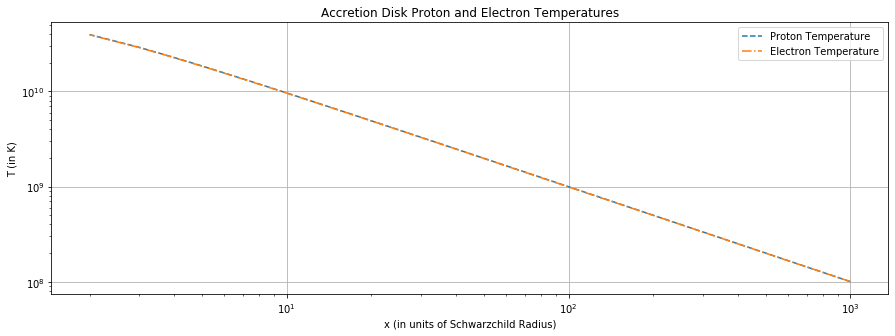

In [46]:
### Plotting

fig = plt.figure()
fig.set_size_inches(15, 5)
plt.grid(True)
plt.loglog(solutions[0, :], solutions[1, :], '--', label = 'Proton Temperature')
plt.loglog(solutions[0, :], solutions[2, :], '-.', label = 'Electron Temperature')
plt.legend()
plt.xlabel('x (in units of Schwarzchild Radius)')
plt.ylabel('T (in K)')
plt.title('Accretion Disk Proton and Electron Temperatures')

---

In [47]:
### Setting the Parameters for the problem

m_dot = 1e17
r_g = Schwarzchild(10 * M_sun)
initials = np.array([1e3, 5e8, 1e8])
N = 1000
a = 1000
b = 2
h = (b - a) / N
solutions = multi_RK4(m_dot, r_g, initials, h, 1001)

Text(0.5, 1.0, 'Accretion Disk Proton and Electron Temperatures')

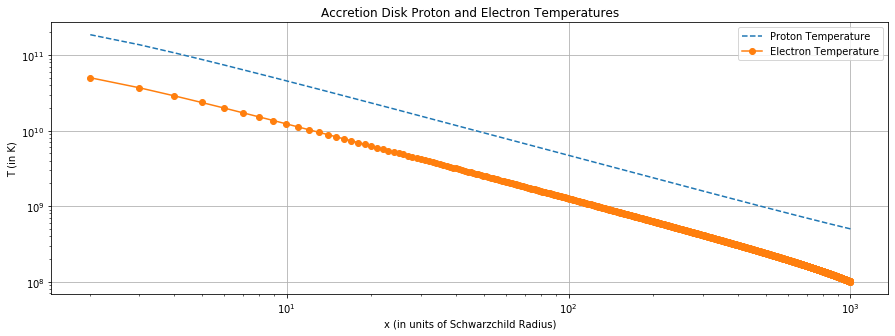

In [48]:
### Plotting 

fig = plt.figure()
fig.set_size_inches(15, 5)
plt.grid(True)
plt.loglog(solutions[0, :], solutions[1, :], '--', label = 'Proton Temperature')
plt.loglog(solutions[0, :], solutions[2, :], 'o-', label = 'Electron Temperature')
plt.legend()
plt.xlabel('x (in units of Schwarzchild Radius)')
plt.ylabel('T (in K)')
plt.title('Accretion Disk Proton and Electron Temperatures')

---

In [49]:
### Setting the Parameters for the problem

m_dot = 1e19
r_g = Schwarzchild(10 * M_sun)
initials = np.array([1e3, 1e8, 1e8])
N = 1000
a = 1000
b = 2
h = (b - a) / N
solutions = multi_RK4(m_dot, r_g, initials, h, N+1)

Text(0.5, 1.0, 'Accretion Disk Proton and Electron Temperatures')

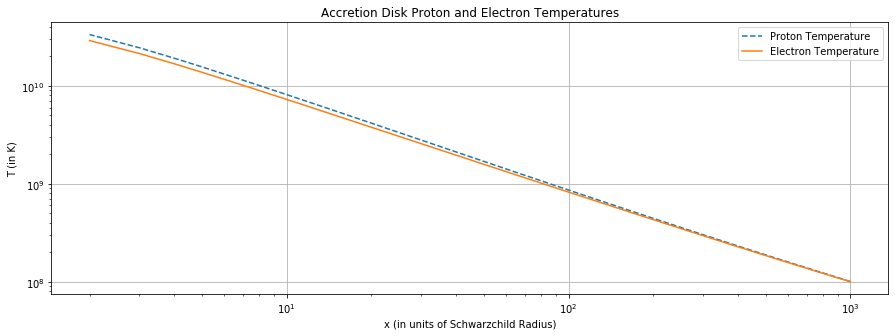

In [50]:
### Plotting 
fig = plt.figure()
fig.set_size_inches(15, 5)
plt.grid(True)
plt.loglog(solutions[0, :], solutions[1, :], '--', label = 'Proton Temperature')
plt.loglog(solutions[0, :], solutions[2, :], label = 'Electron Temperature')
plt.legend()
plt.xlabel('x (in units of Schwarzchild Radius)')
plt.ylabel('T (in K)')
plt.title('Accretion Disk Proton and Electron Temperatures')